# Data preparation

In [1]:
import pandas as pd #import pandas library
df = pd.read_excel('A2_Data.xlsx') #read excel file and store data into df

In [2]:
df.dtypes #data exploration, types

ID                   int64
User                object
Date        datetime64[ns]
Summary             object
Review              object
Rating               int64
Version             object
AppStore            object
dtype: object

In [3]:
df #data exploration, attributes details and total number of rows and columns. This dataset contains 10337 rows, 8 columns. For data types, only 'ID' and 'Rating' in integer, 'Date' in date and rest as object.

,ID,User,Date,Summary,Review,Rating,Version,AppStore
0,1175,4005400,2020-04-27,Resistance is futile,So try to help. My mobile phone number nor my ...,1,1,Apple
1,1128,!Natski!,2020-04-27,Can not register my phone number,I am unable to pass the point of registering m...,1,1,Apple
2,1171,$Lyn$,2020-04-27,Phone number problems,Tried several times. Does not recognise my pho...,1,1,Apple
3,1473,-/::4566,2020-04-27,Mr r mason,This is poorâ€” it wonâ€™t allow me to put in ...,1,1,Apple
4,1104,-Grant1964-,2020-04-27,Will only register if not on wifi,Tried 30+ times over two days to try and regis...,2,1,Apple
...,...,...,...,...,...,...,...,...
10332,1533,Kristina McKay,2021-01-09,NaN,I don't know if it really did anything at all....,2,2,Google
10333,1531,Mario Malfliet,2021-01-09,NaN,Extreme battery use since the Dec update. Sorr...,1,2,Google
10334,1532,Sam,2021-01-09,NaN,Battery is getting killed. Only noticed recent...,1,2,Google
10335,1523,Simon draper,2021-01-09,NaN,"Like others, trying to do the right thing but ...",1,2,Google


In [4]:
df.isnull().sum() #Check null cells. 

ID             0
User           0
Date           0
Summary     8825
Review         0
Rating         0
Version        0
AppStore       0
dtype: int64

In [5]:
df_cleaned = df[['ID','Review','Rating']] #prepare data for text analysing

# Text preparation

In [6]:
#Tokenizing:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
df_tokenized = df_cleaned['Review'].apply(word_tokenize) #break down 'Review' sentence into words

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sammy\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [7]:
#Case folding:
df_casefolded = df_tokenized.apply(lambda x: [word.lower() for word in x]) #for every words in df_tokenlized, change into lower letter, repeat the process

In [8]:
#Stemming:
from nltk.stem import SnowballStemmer #import snowballstemmer
Stemmer = SnowballStemmer('english') #set stemmer
df_stemming = df_casefolded.apply(lambda x: [Stemmer.stem(word) for word in x ]) #apply stemmer to the every words (data after case folding) and store into df_stemming

In [9]:
#Removing stopwords:
nltk.download('stopwords') #download stopwords
from nltk.corpus import stopwords
Stop_words = stopwords.words('english') #import stopwards and store all 179 stop words as Stop_words

New_stop_words = ["0o", "0s", "3a", "3b", "3d", "6b", "6o", "a", "a1", "a2", "a3", "a4", "ab", "able", "about", "above", "abst", "ac", "accordance", "according", "accordingly", "across", "act", "actually", "ad", "added", "adj", "ae", "af", "affected", "affecting", "affects", "after", "afterwards", "ag", "again", "against", "ah", "ain", "ain't", "aj", "al", "all", "allow", "allows", "almost", "alone", "along", "already", "also", "although", "always", "am", "among", "amongst", "amoungst", "amount", "an", "and", "announce", "another", "any", "anybody", "anyhow", "anymore", "anyone", "anything", "anyway", "anyways", "anywhere", "ao", "ap", "apart", "apparently", "appear", "appreciate", "appropriate", "approximately", "ar", "are", "aren", "arent", "aren't", "arise", "around", "as", "a's", "aside", "ask", "asking", "associated", "at", "au", "auth", "av", "available", "aw", "away", "awfully", "ax", "ay", "az", "b", "b1", "b2", "b3", "ba", "back", "bc", "bd", "be", "became", "because", "become", "becomes", "becoming", "been", "before", "beforehand", "begin", "beginning", "beginnings", "begins", "behind", "being", "believe", "below", "beside", "besides", "best", "better", "between", "beyond", "bi", "bill", "biol", "bj", "bk", "bl", "bn", "both", "bottom", "bp", "br", "brief", "briefly", "bs", "bt", "bu", "but", "bx", "by", "c", "c1", "c2", "c3", "ca", "call", "came", "can", "cannot", "cant", "can't", "cause", "causes", "cc", "cd", "ce", "certain", "certainly", "cf", "cg", "ch", "changes", "ci", "cit", "cj", "cl", "clearly", "cm", "c'mon", "cn", "co", "com", "come", "comes", "con", "concerning", "consequently", "consider", "considering", "contain", "containing", "contains", "corresponding", "could", "couldn", "couldnt", "couldn't", "course", "cp", "cq", "cr", "cry", "cs", "c's", "ct", "cu", "currently", "cv", "cx", "cy", "cz", "d", "d2", "da", "date", "dc", "dd", "de", "definitely", "describe", "described", "despite", "detail", "df", "di", "did", "didn", "didn't", "different", "dj", "dk", "dl", "do", "does", "doesn", "doesn't", "doing", "don", "done", "don't", "down", "downwards", "dp", "dr", "ds", "dt", "du", "due", "during", "dx", "dy", "e", "e2", "e3", "ea", "each", "ec", "ed", "edu", "ee", "ef", "effect", "eg", "ei", "eight", "eighty", "either", "ej", "el", "eleven", "else", "elsewhere", "em", "empty", "en", "end", "ending", "enough", "entirely", "eo", "ep", "eq", "er", "es", "especially", "est", "et", "et-al", "etc", "eu", "ev", "even", "ever", "every", "everybody", "everyone", "everything", "everywhere", "ex", "exactly", "example", "except", "ey", "f", "f2", "fa", "far", "fc", "few", "ff", "fi", "fifteen", "fifth", "fify", "fill", "find", "fire", "first", "five", "fix", "fj", "fl", "fn", "fo", "followed", "following", "follows", "for", "former", "formerly", "forth", "forty", "found", "four", "fr", "from", "front", "fs", "ft", "fu", "full", "further", "furthermore", "fy", "g", "ga", "gave", "ge", "get", "gets", "getting", "gi", "give", "given", "gives", "giving", "gj", "gl", "go", "goes", "going", "gone", "got", "gotten", "gr", "greetings", "gs", "gy", "h", "h2", "h3", "had", "hadn", "hadn't", "happens", "hardly", "has", "hasn", "hasnt", "hasn't", "have", "haven", "haven't", "having", "he", "hed", "he'd", "he'll", "hello", "help", "hence", "her", "here", "hereafter", "hereby", "herein", "heres", "here's", "hereupon", "hers", "herself", "hes", "he's", "hh", "hi", "hid", "him", "himself", "his", "hither", "hj", "ho", "home", "hopefully", "how", "howbeit", "however", "how's", "hr", "hs", "http", "hu", "hundred", "hy", "i", "i2", "i3", "i4", "i6", "i7", "i8", "ia", "ib", "ibid", "ic", "id", "i'd", "ie", "if", "ig", "ignored", "ih", "ii", "ij", "il", "i'll", "im", "i'm", "immediate", "immediately", "importance", "important", "in", "inasmuch", "inc", "indeed", "index", "indicate", "indicated", "indicates", "information", "inner", "insofar", "instead", "interest", "into", "invention", "inward", "io", "ip", "iq", "ir", "is", "isn", "isn't", "it", "itd", "it'd", "it'll", "its", "it's", "itself", "iv", "i've", "ix", "iy", "iz", "j", "jj", "jr", "js", "jt", "ju", "just", "k", "ke", "keep", "keeps", "kept", "kg", "kj", "km", "know", "known", "knows", "ko", "l", "l2", "la", "largely", "last", "lately", "later", "latter", "latterly", "lb", "lc", "le", "least", "les", "less", "lest", "let", "lets", "let's", "lf", "like", "liked", "likely", "line", "little", "lj", "ll", "ll", "ln", "lo", "look", "looking", "looks", "los", "lr", "ls", "lt", "ltd", "m", "m2", "ma", "made", "mainly", "make", "makes", "many", "may", "maybe", "me", "mean", "means", "meantime", "meanwhile", "merely", "mg", "might", "mightn", "mightn't", "mill", "million", "mine", "miss", "ml", "mn", "mo", "more", "moreover", "most", "mostly", "move", "mr", "mrs", "ms", "mt", "mu", "much", "mug", "must", "mustn", "mustn't", "my", "myself", "n", "n2", "na", "name", "namely", "nay", "nc", "nd", "ne", "near", "nearly", "necessarily", "necessary", "need", "needn", "needn't", "needs", "neither", "never", "nevertheless", "new", "next", "ng", "ni", "nine", "ninety", "nj", "nl", "nn", "no", "nobody", "non", "none", "nonetheless", "noone", "nor", "normally", "nos", "not", "noted", "nothing", "novel", "now", "nowhere", "nr", "ns", "nt", "ny", "o", "oa", "ob", "obtain", "obtained", "obviously", "oc", "od", "of", "off", "often", "og", "oh", "oi", "oj", "ok", "okay", "ol", "old", "om", "omitted", "on", "once", "one", "ones", "only", "onto", "oo", "op", "oq", "or", "ord", "os", "ot", "other", "others", "otherwise", "ou", "ought", "our", "ours", "ourselves", "out", "outside", "over", "overall", "ow", "owing", "own", "ox", "oz", "p", "p1", "p2", "p3", "page", "pagecount", "pages", "par", "part", "particular", "particularly", "pas", "past", "pc", "pd", "pe", "per", "perhaps", "pf", "ph", "pi", "pj", "pk", "pl", "placed", "please", "plus", "pm", "pn", "po", "poorly", "possible", "possibly", "potentially", "pp", "pq", "pr", "predominantly", "present", "presumably", "previously", "primarily", "probably", "promptly", "proud", "provides", "ps", "pt", "pu", "put", "py", "q", "qj", "qu", "que", "quickly", "quite", "qv", "r", "r2", "ra", "ran", "rather", "rc", "rd", "re", "readily", "really", "reasonably", "recent", "recently", "ref", "refs", "regarding", "regardless", "regards", "related", "relatively", "research", "research-articl", "respectively", "resulted", "resulting", "results", "rf", "rh", "ri", "right", "rj", "rl", "rm", "rn", "ro", "rq", "rr", "rs", "rt", "ru", "run", "rv", "ry", "s", "s2", "sa", "said", "same", "saw", "say", "saying", "says", "sc", "sd", "se", "sec", "second", "secondly", "section", "see", "seeing", "seem", "seemed", "seeming", "seems", "seen", "self", "selves", "sensible", "sent", "serious", "seriously", "seven", "several", "sf", "shall", "shan", "shan't", "she", "shed", "she'd", "she'll", "shes", "she's", "should", "shouldn", "shouldn't", "should've", "show", "showed", "shown", "showns", "shows", "si", "side", "significant", "significantly", "similar", "similarly", "since", "sincere", "six", "sixty", "sj", "sl", "slightly", "sm", "sn", "so", "some", "somebody", "somehow", "someone", "somethan", "something", "sometime", "sometimes", "somewhat", "somewhere", "soon", "sorry", "sp", "specifically", "specified", "specify", "specifying", "sq", "sr", "ss", "st", "still", "stop", "strongly", "sub", "substantially", "successfully", "such", "sufficiently", "suggest", "sup", "sure", "sy", "system", "sz", "t", "t1", "t2", "t3", "take", "taken", "taking", "tb", "tc", "td", "te", "tell", "ten", "tends", "tf", "th", "than", "thank", "thanks", "thanx", "that", "that'll", "thats", "that's", "that've", "the", "their", "theirs", "them", "themselves", "then", "thence", "there", "thereafter", "thereby", "thered", "therefore", "therein", "there'll", "thereof", "therere", "theres", "there's", "thereto", "thereupon", "there've", "these", "they", "theyd", "they'd", "they'll", "theyre", "they're", "they've", "thickv", "thin", "think", "third", "this", "thorough", "thoroughly", "those", "thou", "though", "thoughh", "thousand", "three", "throug", "through", "throughout", "thru", "thus", "ti", "til", "tip", "tj", "tl", "tm", "tn", "to", "together", "too", "took", "top", "toward", "towards", "tp", "tq", "tr", "tried", "tries", "truly", "try", "trying", "ts", "t's", "tt", "tv", "twelve", "twenty", "twice", "two", "tx", "u", "u201d", "ue", "ui", "uj", "uk", "um", "un", "under", "unfortunately", "unless", "unlike", "unlikely", "until", "unto", "uo", "up", "upon", "ups", "ur", "us", "use", "used", "useful", "usefully", "usefulness", "uses", "using", "usually", "ut", "v", "va", "value", "various", "vd", "ve", "ve", "very", "via", "viz", "vj", "vo", "vol", "vols", "volumtype", "vq", "vs", "vt", "vu", "w", "wa", "want", "wants", "was", "wasn", "wasnt", "wasn't", "way", "we", "wed", "we'd", "welcome", "well", "we'll", "well-b", "went", "were", "we're", "weren", "werent", "weren't", "we've", "what", "whatever", "what'll", "whats", "what's", "when", "whence", "whenever", "when's", "where", "whereafter", "whereas", "whereby", "wherein", "wheres", "where's", "whereupon", "wherever", "whether", "which", "while", "whim", "whither", "who", "whod", "whoever", "whole", "who'll", "whom", "whomever", "whos", "who's", "whose", "why", "why's", "wi", "widely", "will", "willing", "wish", "with", "within", "without", "wo", "won", "wonder", "wont", "won't", "words", "world", "would", "wouldn", "wouldnt", "wouldn't", "www", "x", "x1", "x2", "x3", "xf", "xi", "xj", "xk", "xl", "xn", "xo", "xs", "xt", "xv", "xx", "y", "y2", "yes", "yet", "yj", "yl", "you", "youd", "you'd", "you'll", "your", "youre", "you're", "yours", "yourself", "yourselves", "you've", "yr", "ys", "yt", "z", "zero", "zi", "zz"] #modify stop words and add more to the list (found from https://gist.github.com/sebleier/554280)
Stopwords = Stop_words + New_stop_words #combine two stop words list, now it contains 1339 stop words
Stopwords.extend([",",".","'s",':','https','covidsaf']) #now it contains 1345 stop words

df_stopwordsed = df_stemming.apply(lambda x: [word for word in x if word not in Stopwords]) #keep word that is not in Stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sammy\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
#additional filtering
df_wordlengthed = df_stopwordsed.apply(lambda x: [word for word in x if len(word) >2]) #filter out words with less than 3 letters

import re #regular expression operation library
df_newlined = df_wordlengthed.apply(lambda x: [re.sub('\s+', ' ', sent) for sent in x]) # Remove new line characters
df_singlequoted = df_newlined.apply(lambda x: [re.sub("\'", "", sent) for sent in x]) # Remove distracting single quotes

In [11]:
#Enriching data:
df_enriching = df_singlequoted.apply(lambda x:" ".join(x)) #join words in df_stopwordsed list and separate by single space and store into df_enriching (convert list to string)
df_enriched = df_cleaned #store data cleaned into df_enriched
df_enriched["Processed_Review"]= df_enriching #add new column 'Processed_Review' into df_enriched with df_enriching's data

<ipython-input-11-74848ff7e2bc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_enriched["Processed_Review"]= df_enriching #add new column 'Processed_Review' into df_enriched with df_enriching's data


# Text analytics

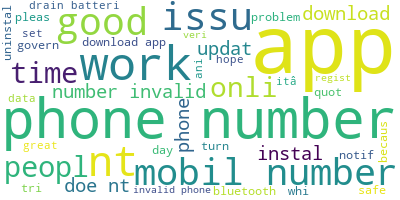

In [12]:
#wordclouding:
from wordcloud import WordCloud
Word_cloud = WordCloud(background_color="white", max_words=40)

df_enriching_long_string =','.join(list(df_enriching.values)) # Join all reviews together into 1 long string

Word_cloud.generate(df_enriching_long_string)
Word_cloud.to_image() # Generate wordcloud and visualize

In [13]:
#LDA analysis
df_LDA = df_singlequoted #store df_singlequoted as df_LDA (data for LDA analysis)

In [14]:
import warnings
warnings.filterwarnings(action='ignore', category=UserWarning, module='gensim') #suppress the warning message
import gensim.corpora as corpora

In [15]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(df_LDA)
# Create Corpus
texts = df_LDA
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

In [16]:
# Build LDA model
from gensim import models
num_topics = 5
LDA_model = models.LdaMulticore(corpus=corpus, id2word=id2word, num_topics=num_topics)

In [17]:
# Analyzing LDA model results: group all reviews into 5 topics, single review can have multiple topics
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()

import os
LDAvis_data_filepath = os.path.join('./results/ldavis_prepared_'+str(num_topics))

gensimvis.prepare(LDA_model, corpus, id2word)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.006105 -0.030470       1        1  31.054638
3      0.038055  0.017809       2        1  26.224745
2      0.046305  0.037406       3        1  18.538040
4     -0.004667 -0.053579       4        1  18.348865
0     -0.085797  0.028834       5        1   5.833712, topic_info=         Term         Freq        Total Category  logprob  loglift
8      number  2174.000000  2174.000000  Default  30.0000  30.0000
300      good   663.000000   663.000000  Default  29.0000  29.0000
46       work  1910.000000  1910.000000  Default  28.0000  28.0000
349   batteri  1387.000000  1387.000000  Default  27.0000  27.0000
9       phone  2787.000000  2787.000000  Default  26.0000  26.0000
...       ...          ...          ...      ...      ...      ...
3053     quot    29.357164   588.865775   Topic5  -5.3927  -0.1571
38    problem    26.404830   421.789736   Topic5  -5.4987   0.0706
212     peopl    28.101842   730.039959   Topic5  -5.4364  -0.4157
109     locat    27.029039   612.761376   Topic5  -5.4753  -0.2795
44      great    26.642844   732.974983   Topic5  -5.4897  -0.4731

[449 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
309       1  0.097897     +61
309       2  0.293692     +61
309       3  0.522120     +61
309       4  0.081581     +61
3525      2  0.900579  +61408
...     ...       ...     ...
1835      4  0.064357     ðÿ¤
2143      2  0.900397    ðÿ¤ª
4868      2  0.368754    ðÿ˜
4868      5  0.553131    ðÿ˜
2869      4  0.922657    žðÿ

[974 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 4, 3, 5, 1])

In [18]:
print(LDA_model.print_topics()) # Print Keywords of each topic

[(0, '0.019*"work" + 0.019*"good" + 0.019*"app" + 0.014*"nt" + 0.014*"batteri" + 0.012*"veri" + 0.011*"easi" + 0.010*"doe" + 0.008*"regist" + 0.008*"safe"'), (1, '0.071*"app" + 0.023*"bluetooth" + 0.015*"phone" + 0.014*"work" + 0.014*"nt" + 0.011*"download" + 0.010*"issu" + 0.010*"safe" + 0.009*"day" + 0.009*"data"'), (2, '0.048*"app" + 0.042*"number" + 0.038*"phone" + 0.018*"nt" + 0.016*"mobil" + 0.015*"download" + 0.013*"work" + 0.013*"doe" + 0.013*"regist" + 0.011*"invalid"'), (3, '0.044*"app" + 0.035*"phone" + 0.034*"number" + 0.033*"nt" + 0.019*"tri" + 0.017*"instal" + 0.016*"work" + 0.016*"invalid" + 0.014*"batteri" + 0.014*"time"'), (4, '0.044*"app" + 0.027*"work" + 0.024*"batteri" + 0.022*"phone" + 0.015*"great" + 0.014*"notif" + 0.012*"download" + 0.011*"locat" + 0.010*"instal" + 0.010*"drain"')]


C:\Users\sammy\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [19]:
# Compute Coherence Score
from gensim.models import CoherenceModel
coherence_model_lda = CoherenceModel(model=LDA_model, texts=texts, dictionary=id2word, coherence='c_v')
coherence_score = coherence_model_lda.get_coherence()

C:\Users\sammy\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [20]:
coherence_score #coherence score is a little bit small. The LDA model can be improved (e.g. higher coherence score) by building LDA Mallet Model, we can also find the optimal LDA model (most approperiate number of topics) with the highest coherence score.

C:\Users\sammy\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0.3387364479511641

In [21]:
#extract topic number
def format_topics(ldamodel=LDA_model, corpus=corpus, texts=texts): #define a function format topic with parameter LDA model, corpus and texts
    sent_topics_df = pd.DataFrame()
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  
                wp = ldamodel.show_topic(topic_num)
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num)+1, round(prop_topic,4)]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution']

    return(sent_topics_df)

df_topic_sents_keywords = format_topics(ldamodel=LDA_model, corpus=corpus, texts=texts)
df_dominant_topic = df_topic_sents_keywords.reset_index()
dominant_topic = df_dominant_topic[['Dominant_Topic','Perc_Contribution']]
df_topiced = pd.concat([df_enriched,dominant_topic],axis = 1)

C:\Users\sammy\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [22]:
#Sentiment analysis:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
Sentiment_analyser = SentimentIntensityAnalyzer() #store sentiment analyzer as Sentiment_analyser
sentimental_text_list = [] #create a list called sentimental_text_list

for sentence in df_topiced["Processed_Review"]: #for loop use sentiment analyzer to analyse sentence/review in 'Processed_Review' column
    text_score = Sentiment_analyser.polarity_scores(sentence)['compound'] #provide only 'compound' score and store as text_score
    sentimental_text_list.append(text_score) #store data in text_score into sentimental_text_list list
    
df_topiced['Sentiment_Score'] = sentimental_text_list #create new column 'Sentiment_Score' and store sentimental_text_list into this column
df_topiced[df_topiced['Sentiment_Score'] == 0] #check number of 0 sentiment score (neutral sentiment), 3412 out of 10337 (33%) are scored neutral for sentiment 

C:\Users\sammy\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,ID,Review,Rating,Processed_Review,Dominant_Topic,Perc_Contribution,Sentiment_Score
19,1047,Personal freedom and liberty is only up to the...,5,person freedom liberti onli lowest denomin don...,5.0,0.9313,0.0
25,1097,Easily downloaded the app. But does not acknow...,1,easili download app doe acknowledg mobil wonâ€...,3.0,0.9095,0.0
32,1372,Doing my bit to ensure my and communityâ€™s we...,5,bit ensur communityâ€™ wellb,3.0,0.8386,0.0
36,1347,Do the right thing. Download the app. Letâ€™s ...,5,thing download app letâ€™ live sooner,5.0,0.8804,0.0
44,1060,"I am very privacy conscious, and I cannot know...",5,veri privaci conscious app futur respons thing,2.0,0.8970,0.0
...,...,...,...,...,...,...,...
10329,1546,If I could rate negative stars it would be neg...,1,rate negat star negat,5.0,0.8379,0.0
10331,1526,sits in background giving messages saying not ...,1,sit background messag activ nt open whi activ,4.0,0.9084,0.0
10332,1533,I don't know if it really did anything at all....,2,nt realli anyth sign idea,4.0,0.8644,0.0
10333,1531,Extreme battery use since the Dec update. Sorr...,1,extrem batteri sinc dec updat sorri uninstal,2.0,0.8976,0.0


In [23]:
#TF-IDF:
from sklearn.feature_extraction.text import TfidfVectorizer
Vectorizer = TfidfVectorizer ()
Vectorized_Review = Vectorizer.fit_transform(df_topiced["Processed_Review"])
Vectorized_Review #vectorize 'Processed_Review' and obtain a vector of 10337 rows and 6025 columns

C:\Users\sammy\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<10337x6025 sparse matrix of type '<class 'numpy.float64'>'
	with 99217 stored elements in Compressed Sparse Row format>

In [24]:
#Dimension reduciton using SVD: #similar SVD means similar sentence
from sklearn.decomposition import TruncatedSVD
SVD = TruncatedSVD(n_components=3, n_iter=100) #reduce columns of vector into 3
SVD_Review= SVD.fit_transform(Vectorized_Review) #apply SVD and store the result into SVD_Review
df_topiced[['SVD1','SVD2', 'SVD3']]=SVD_Review #add new columns to df_topiced and store with SVD_Review

C:\Users\sammy\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [25]:
df_ready = df_topiced #now we have added sentiment scores and 3 components-SVD (drived from processed review) into the dataset. Data is ready for modelling

C:\Users\sammy\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Model building & evaluation 

In [26]:
target_y =  df_ready["Rating"]
feature_x = df_ready[['Dominant_Topic','Perc_Contribution','Sentiment_Score','SVD1','SVD2','SVD3']]
feature_x.corr() #no identical correlation, can be used to predict target y.

C:\Users\sammy\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Dominant_Topic,Perc_Contribution,Sentiment_Score,SVD1,SVD2,SVD3
Dominant_Topic,1.000000,0.108203,-0.039759,0.117324,-0.027124,0.123828
Perc_Contribution,0.108203,1.000000,-0.043832,0.175477,-0.091615,-0.015370
Sentiment_Score,-0.039759,-0.043832,1.000000,0.012628,0.090385,-0.029309
SVD1,0.117324,0.175477,0.012628,1.000000,-0.585876,0.035454
SVD2,-0.027124,-0.091615,0.090385,-0.585876,1.000000,0.021264
SVD3,0.123828,-0.015370,-0.029309,0.035454,0.021264,1.000000


In [27]:
from sklearn import linear_model
lm = linear_model.LinearRegression()
lm.fit(feature_x, target_y)
lm.coef_ #coefficient of factors with target rating

C:\Users\sammy\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([-0.06256994, -1.25752147,  1.37166834, -2.90290247,  2.22771678,
        2.85614433])

In [28]:
lm.score(feature_x, target_y) #R square, 28% explains little about the target. Not a good regression model

C:\Users\sammy\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0.28001136587764897

In [29]:
#Nueral Network
from sklearn.neural_network import MLPRegressor
My_NN = MLPRegressor(hidden_layer_sizes=(25,), max_iter=500)
mlp = My_NN.fit(feature_x,target_y)

from sklearn.model_selection import cross_val_score
scores = cross_val_score(mlp, feature_x, target_y, cv=5)

C:\Users\sammy\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [30]:
scores.mean() #13.07% after cross-validation

C:\Users\sammy\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0.1307242269474387

In [44]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(feature_x, target_y)
print(mnb.predict(feature_x)) #does not work with negative input

C:\Users\sammy\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


ValueError: Negative values in data passed to MultinomialNB (input X)

In [39]:
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors=3)
knn_model.fit(feature_x, target_y)
knn_scores = cross_val_score(knn_model, feature_x, target_y, cv=5)
knn_scores.mean() #negative result after cross-validation

C:\Users\sammy\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


-0.044642985330998905